<a href="https://colab.research.google.com/github/not-rudy/Applied-Computational-Methods/blob/main/ModuleBa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rudy Medrano


Module B2


17.4 Lagrange Polynomial Interpolation

Lagrange Polynomial Interpolation: finds a single polynomial that goes through an entire set of data points. The interpolation function L(x) should have the property L(xi) = yi, for every point in the dataset.


Computing Lagrange Polynomials: The lagrange polynomial must be written as a linear combination of "Lagrange Basis Polynomials," Pi(x), where each basis polynomial is:

 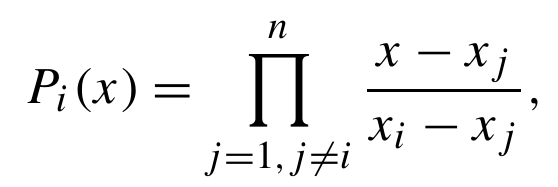

and the Lagrange Polynomial is:

 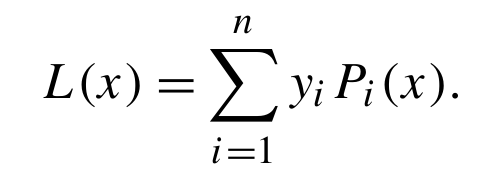

Example:


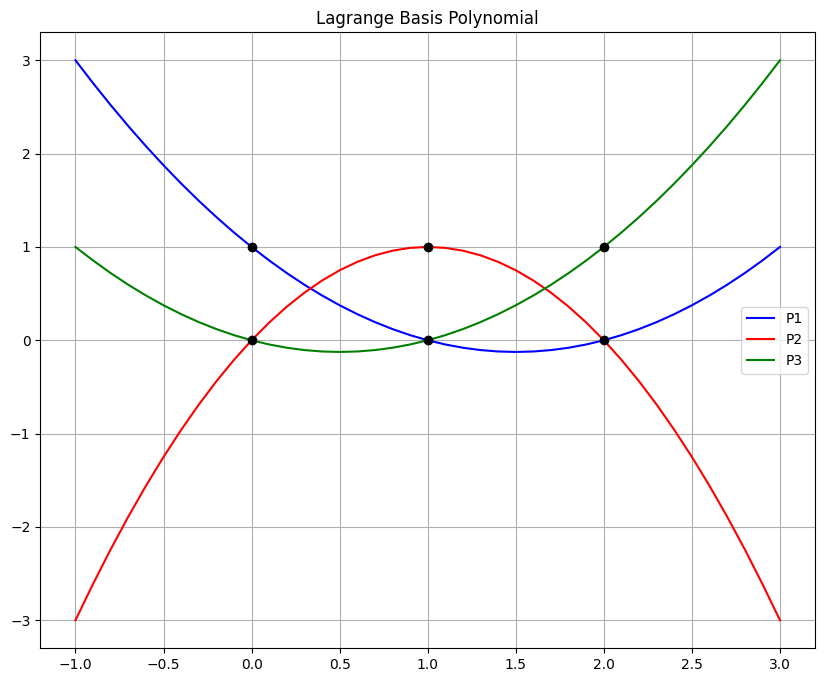

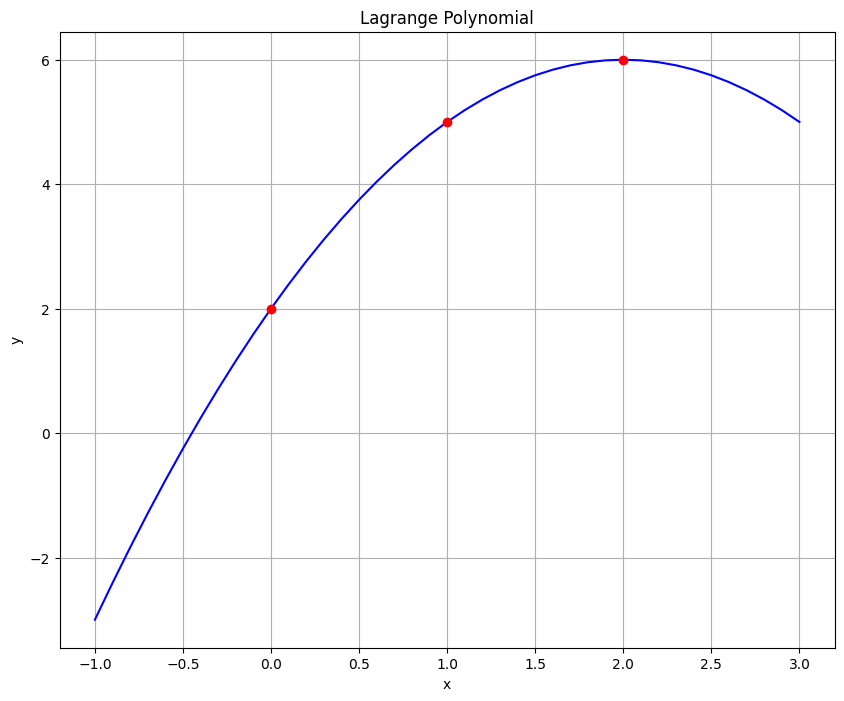

In [17]:
# Using Lagrange Polynomial Interpolation

import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# Establish dataset

x = [0, 1, 2]
y = [2, 5, 6]

# Establish the coefficients for each Polynomial

P1_co = [1, -1.5, .5]
P2_co = [0, 2, -1]
P3_co = [0, -.5, .5]

# Get the polynomial functions from given information

P1 = poly.Polynomial(P1_co)
P2 = poly.Polynomial(P2_co)
P3 = poly.Polynomial(P3_co)

x_new = np.arange(-1.0, 3.1, 0.1)

# Plot the functions and grid

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), "b", label = "P1")
plt.plot(x_new, P2(x_new), "r", label = "P2")
plt.plot(x_new, P3(x_new), "g", label = "P3")

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title("Lagrange Basis Polynomial")
plt.grid()
plt.legend()
plt.show()

# Verify that polynomial goes through each of the data points

L = 2*P1 + 5*P2 + 6*P3

fig = plt.figure(figsize=(10,8))
plt.plot(x_new, L(x_new), "b", x, y, "ro")
plt.title ("Lagrange Polynomial")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

17.4.1 Lagrange Function Form

Lagrange Function Form: SciPy library can be used to import a lagrange function. This allows us to directly interpolation data.

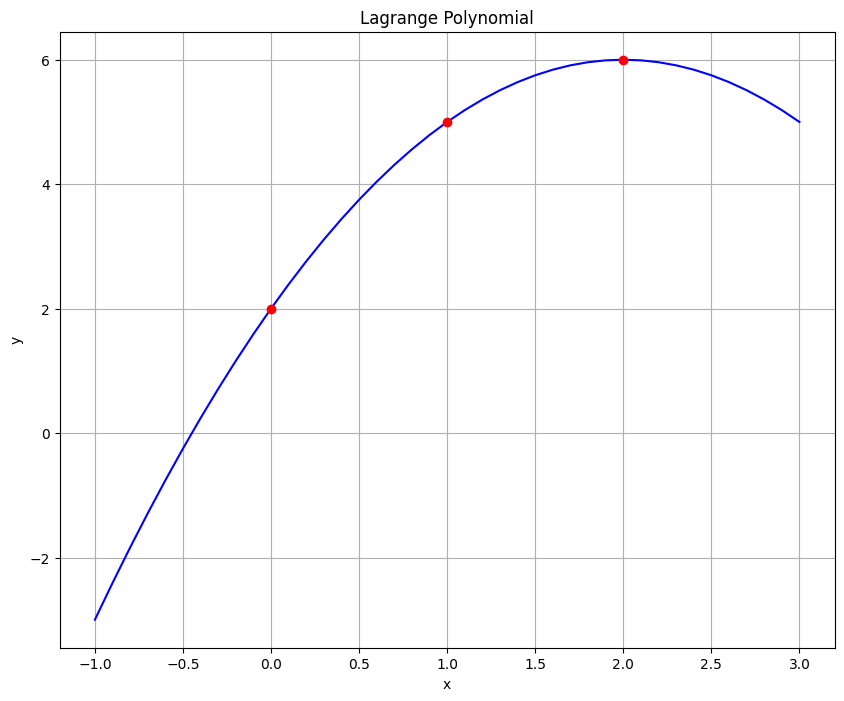

In [23]:
# Using the Lagrange Function Form

from scipy.interpolate import lagrange

f = lagrange(x, y)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), "b", x, y, "ro")
plt.title ("Lagrange Polynomial")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

As seen above, the lagrange function from SciPy is equivalent to manually calculating the interpolation.

17.5 Newton's Polynomial Interpolation

Newton's Polynomial Interpolation: Another method that creates an exact fit of a dataset.

General Form:

 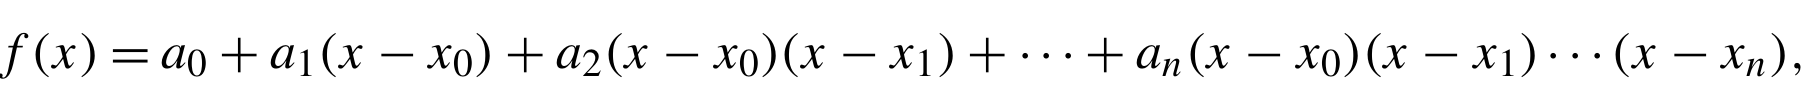

 Can be rewritten as:

 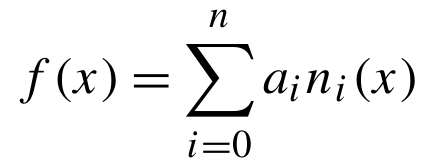

 where

 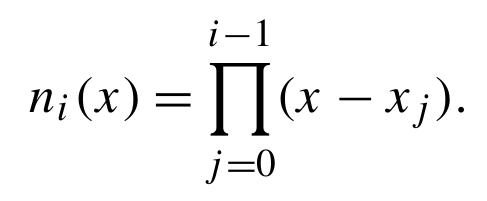

Special Feature: Newton's polynomial coeffecients ai can be determined using a simple mathematical procedure. If given a data point (xi, yi), a function f(xi) = yi exists where the polynomial goes through each data point.
This means:

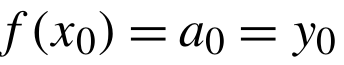

and

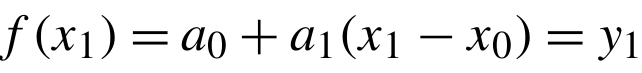

so

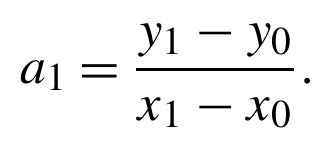

Example using Newton's Polynomial Interpolation

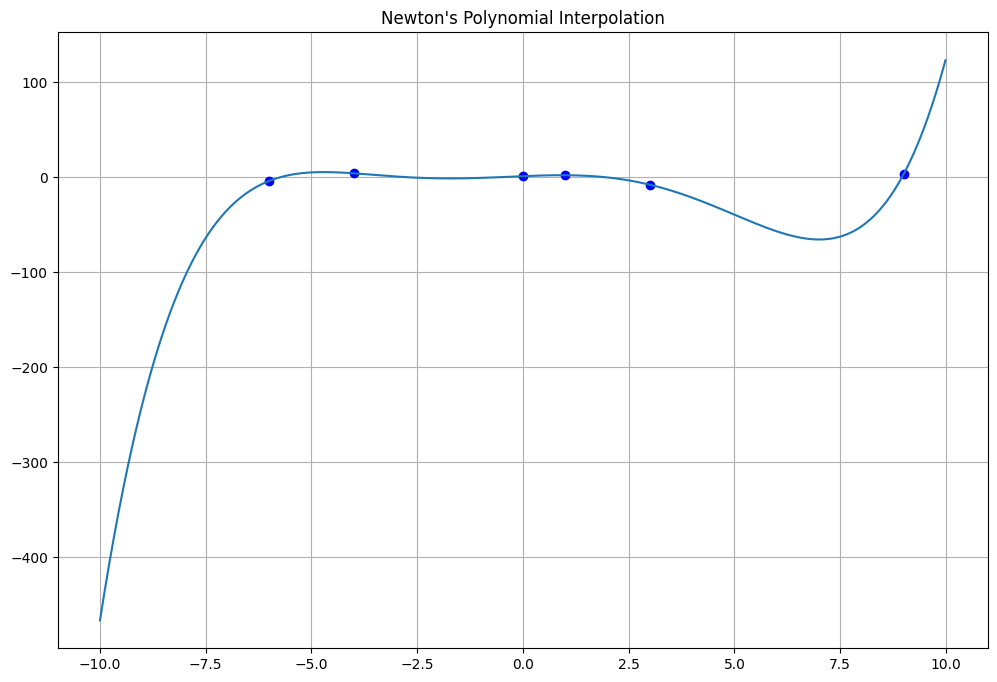

In [33]:
# Example
# Newton's Polynomial Interpolation Example
# Dataset: x = [-6, -4, 0, 1, 3, 9] ; y = [-4, 4, 1, 2, -8, 3]

# import necessary functions and libraries

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def divided_diff(x, y):
    '''
    function to calculate the divided differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p


x = np.array([-6, -4, 0, 1, 3, 9]) ; y = np.array([-4, 4, 1, 2, -8, 3])

# Calculating coefficients via the divided difference

a_s = divided_diff(x, y)[0, :]

# evaluate on new data points

x_new = np.arange(-10, 10, .01)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.title("Newton's Polynomial Interpolation") ; plt.grid()
plt.show()